<h1>1. Decision Tree </h1>

## Loading Data

In [0]:
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
import pickle

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/preprocessed_data.csv')

In [3]:
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


## Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [0]:
y =data['project_is_approved']
x = data.drop(['project_is_approved'],axis=1)
X_train, X_test ,Y_train,Y_test = train_test_split(x,y,test_size = 0.25,stratify =y)

(27312, 8) (27312,)
75.0 25.0
**************************************************
**************************************************


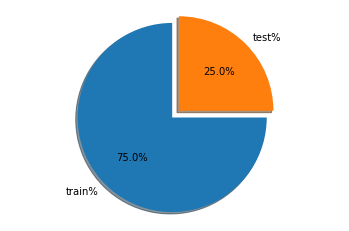

In [5]:
print(X_test.shape,Y_test.shape)
total = Y_train.shape[0] + Y_test.shape[0]
trainP = (Y_train.shape[0]/total)*100
testP = (Y_test.shape[0]/total)*100

print(trainP,testP)
print("*"*50)
print("*"*50)
##pie chart reference : https://matplotlib.org/3.2.1/gallery/pie_and_polar_charts/pie_features.html
labels = ['train%','test%']
sizes = [trainP,testP]
explode = (0.1,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



# Make Data Model Ready: encoding eassay, and project_title</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

# TASK 1.1: TFIDF

## Encoding essay

In [6]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['essay'].values)

X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)
#X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, Y_train.shape)
#print(X_cv_essay_tfidf.shape, Y_cv.shape)
print(X_test_essay_tfidf.shape, Y_test.shape)
print("="*100)
essay = vectorizer.get_feature_names()
len(essay)

After vectorizations
(81936, 50218) (81936,)
(27312, 50218) (27312,)


50218

## Encoding categorical features :</br>
school_state,teacher_prefix,project_grade_category,clean_categories,clean_subcategories

## school_state

In [7]:
vectorizer = CountVectorizer(binary=True)

#school_state
X_train_school_state_tfidf =vectorizer.fit_transform(X_train['school_state'].values)
X_test_school_state_tfidf = vectorizer.transform(X_test['school_state'].values)


print("After vectorizations")
print(X_train_school_state_tfidf.shape, Y_train.shape)

print(X_test_school_state_tfidf.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
school_state = vectorizer.get_feature_names()


After vectorizations
(81936, 51) (81936,)
(27312, 51) (27312,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


## teacher_prefix


In [8]:
vectorizer = CountVectorizer(binary=True)


X_train_teacher_prefix_tfidf =vectorizer.fit_transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix_tfidf = vectorizer.transform(X_test['teacher_prefix'].values)


print("After vectorizations")
print(X_train_teacher_prefix_tfidf.shape, Y_train.shape)

print(X_test_teacher_prefix_tfidf.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

teacher_prefix = vectorizer.get_feature_names()

After vectorizations
(81936, 5) (81936,)
(27312, 5) (27312,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


## project_grade_category

In [9]:
vectorizer = CountVectorizer(binary=True)

X_train_project_grade_category_tfidf =vectorizer.fit_transform(X_train['project_grade_category'].values)
X_test_project_grade_category_tfidf = vectorizer.transform(X_test['project_grade_category'].values)


print("After vectorizations")
print(X_train_project_grade_category_tfidf.shape, Y_train.shape)
print(X_test_project_grade_category_tfidf.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
project_grade_category =vectorizer.get_feature_names()

After vectorizations
(81936, 4) (81936,)
(27312, 4) (27312,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


## clean_categories

In [10]:
vectorizer = CountVectorizer(binary=True)


X_train_clean_categories_tfidf =vectorizer.fit_transform(X_train['clean_categories'].values)
X_test_clean_categories_tfidf = vectorizer.transform(X_test['clean_categories'].values)


print("After vectorizations")
print(X_train_clean_categories_tfidf.shape, Y_train.shape)
print(X_test_clean_categories_tfidf.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
clean_categories =vectorizer.get_feature_names()

After vectorizations
(81936, 9) (81936,)
(27312, 9) (27312,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


## clean_subcategories

In [11]:
vectorizer = CountVectorizer(binary=True)


X_train_clean_subcategories_tfidf =vectorizer.fit_transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories_tfidf = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcategories_tfidf.shape, Y_train.shape)
print(X_test_clean_subcategories_tfidf.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

clean_subcategories = vectorizer.get_feature_names()

After vectorizations
(81936, 30) (81936,)
(27312, 30) (27312,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


## 1.4 Make Data Model Ready: encoding numerical, categorical features

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

## Encoding Numerical Features </br>

### teacher_number_of_previously_posted_projects

In [12]:
from sklearn.preprocessing import StandardScaler
standardise = StandardScaler()
X_train_teacher_number_of_previously_posted_projects_norm=standardise.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_number_of_previously_posted_projects_norm = standardise.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_teacher_number_of_previously_posted_projects_norm.shape, Y_train.shape)
#print(X_cv_teacher_number_of_previously_posted_projects_norm.shape, Y_cv.shape)
print(X_test_teacher_number_of_previously_posted_projects_norm.shape, Y_test.shape)
print("="*100)


After vectorizations
(81936, 1) (81936,)
(27312, 1) (27312,)


## price

In [13]:
from sklearn.preprocessing import StandardScaler
standardise = StandardScaler()
X_train_price_norm=standardise.fit_transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = standardise.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, Y_train.shape)
#print(X_cv_price_norm.shape, Y_cv.shape)
print(X_test_price_norm.shape, Y_test.shape)
print("="*100)


After vectorizations
(81936, 1) (81936,)
(27312, 1) (27312,)


## concatenating all the features

In [15]:
from scipy.sparse import hstack

X_tr_tfidf = hstack((X_train_essay_tfidf,X_train_school_state_tfidf,X_train_teacher_prefix_tfidf,X_train_project_grade_category_tfidf,\
               X_train_clean_categories_tfidf,X_train_clean_subcategories_tfidf,\
               X_train_teacher_number_of_previously_posted_projects_norm,X_train_price_norm))

X_ts_tfidf = hstack((X_test_essay_tfidf,X_test_school_state_tfidf,X_test_teacher_prefix_tfidf,X_test_project_grade_category_tfidf,\
               X_test_clean_categories_tfidf,X_test_clean_subcategories_tfidf,\
               X_test_teacher_number_of_previously_posted_projects_norm,X_test_price_norm))

print("Final Data matrix")
print(X_tr_tfidf.shape, Y_train.shape)
print(X_ts_tfidf.shape, Y_test.shape)

print("="*100)

Final Data matrix
(81936, 50319) (81936,)
(27312, 50319) (27312,)


## 1.5 Appling  Decision Tree on different kind of featurization as mentioned in the instructions

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import plotly.graph_objects as go
import numpy as np
DT = DecisionTreeClassifier()
parameters = {"max_depth":[1, 5, 10, 50],"min_samples_split":[5, 10, 100, 500]}
clf = RandomizedSearchCV(DT,parameters,cv =3,scoring='roc_auc',return_train_score=True)
clf.fit(X_tr_tfidf,Y_train)


results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['rank_test_score'])
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
7,12.937114,0.246003,0.034916,0.000328,100,10,"{'min_samples_split': 100, 'max_depth': 10}",0.650598,0.644810,0.641813,0.645740,0.003646,1,0.685574,0.693753,0.697150,0.692159,0.004859
5,6.063464,0.029882,0.033904,0.000259,10,5,"{'min_samples_split': 10, 'max_depth': 5}",0.628414,0.624342,0.626504,0.626420,0.001663,2,0.633422,0.638891,0.641200,0.637837,0.003262
9,6.059069,0.006128,0.034134,0.000035,5,5,"{'min_samples_split': 5, 'max_depth': 5}",0.628336,0.624428,0.626349,0.626371,0.001596,3,0.633422,0.638977,0.641243,0.637880,0.003286
6,6.050309,0.048256,0.034130,0.000282,500,5,"{'min_samples_split': 500, 'max_depth': 5}",0.628302,0.624195,0.626554,0.626350,0.001683,4,0.633321,0.638888,0.640970,0.637726,0.003229
2,6.032584,0.017940,0.034066,0.000545,100,5,"{'min_samples_split': 100, 'max_depth': 5}",0.628379,0.624028,0.626637,0.626348,0.001788,5,0.633411,0.638891,0.641071,0.637791,0.003222


In [0]:
#reference: https://plotly.com/python/3d-scatter-plots/
x = results['param_min_samples_split']
y =  results['param_max_depth']
z_test = results['mean_test_score']
z_train = results['mean_train_score']
trace1 = go.Scatter3d(x=x,y=y,z=z_train, name = 'train')
trace2 = go.Scatter3d(x=x,y=y,z=z_test, name = 'Cross validation')
data = [trace1, trace2]
layout = go.Layout(scene = dict(
        xaxis = dict(title='min_sample_split'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))
fig = go.Figure(data=data,layout=layout)
fig.show()

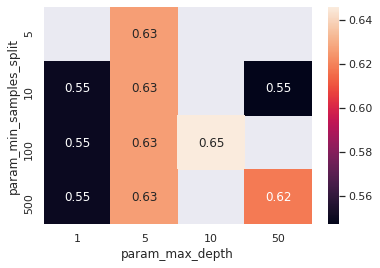

In [0]:
#reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html
import seaborn as sns
sns.set()
seaborn_data = results.pivot("param_min_samples_split","param_max_depth","mean_test_score")
ax = sns.heatmap(seaborn_data, annot=True)

In [0]:
best_params =clf.best_params_
best_params

{'max_depth': 10, 'min_samples_split': 100}

## Testing the performance of the model on test data, plotting ROC Curves

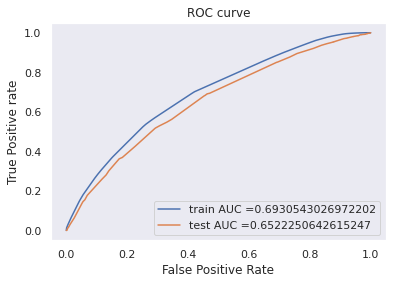

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


DT_classifier = DecisionTreeClassifier(max_depth=best_params['max_depth'],min_samples_split=best_params['min_samples_split'])
DT_classifier.fit(X_tr_tfidf,Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

#y_train_pred = batch_predict(multinb, X_tr_tfidf) 
y_train_pred=DT_classifier.predict_proba(X_tr_tfidf)[:,1]   
y_test_pred = DT_classifier.predict_proba(X_ts_tfidf)[:,1]


train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.title("ROC curve")
plt.grid()
plt.show()

In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


print("="*100)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
pred = predict_with_best_t(y_test_pred, best_t)
test_confusion_matrix =confusion_matrix(Y_test, predict_with_best_t(y_test_pred, best_t))
print(test_confusion_matrix)

the maximum value of tpr*(1-fpr) 0.40742996843284446 for threshold 0.85
Train confusion matrix
[[ 7316  5091]
 [21488 48041]]
Test confusion matrix
[[ 2259  1876]
 [ 7382 15795]]


## plotting wordcloud

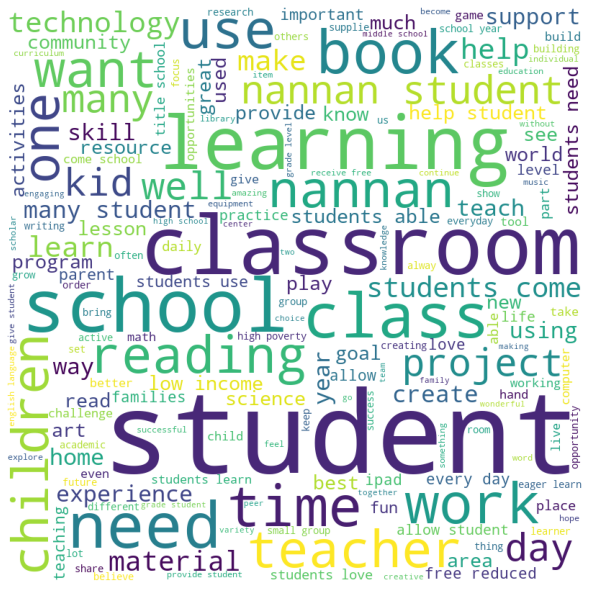

In [0]:
#reference: https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud
words = ''
#take out the index from Y_test
indexes = list(Y_test.index)
teacher_no_previously_posted = list()
price = list()
count = 0
for i in indexes:
  if Y_test[i]==0 and pred[count]==1:
    essay = X_test['essay'][i].split()
    price.append(X_test['price'][i])
    teacher_no_previously_posted.append(X_test['teacher_number_of_previously_posted_projects'][i])
    words += " ".join(essay)+" "
  count +=1  

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

## ploting price boxplot

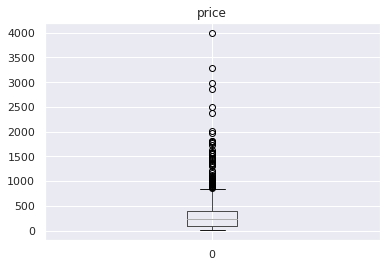

In [0]:
price_df = pd.DataFrame(price)
price_df.boxplot()
plt.title("price")
plt.show()

## plotting PDF

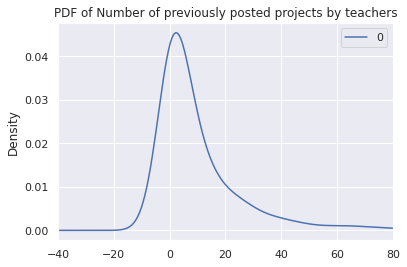

In [0]:
#https://scipy-lectures.org/intro/scipy/auto_examples/plot_normal_distribution.html#sphx-glr-download-intro-scipy-auto-examples-plot-normal-distribution-py
# from scipy import stats
# bins = np.linspace(-5, 5, 30)
# histogram, bins = np.histogram(teacher_no_previously_posted, bins=bins, density=True)
# bin_centers = 0.5*(bins[1:] + bins[:-1])

# pdf = stats.norm.pdf(bin_centers)
# plt.figure(figsize=(6, 4))
# plt.plot(bin_centers, pdf, label="PDF")
# plt.legend()
# plt.show()
new_df =pd.DataFrame(teacher_no_previously_posted)
new_df.plot.kde()
plt.title("PDF of Number of previously posted projects by teachers")
plt.xlim(-40,80)
plt.show()

# TFIDF_weighted_W2VEC

## Encoding essays

In [0]:

with open('/content/drive/My Drive/Colab Notebooks/data/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in X_train['essay']: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

81936
300


In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in X_test['essay']: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

27312
300


## concatenating all the features

In [0]:
# tfidf_w2v_vectors_train=np.array(tfidf_w2v_vectors)
# tfidf_w2v_vectors_tst =np.array(tfidf_w2v_vectors_test)
# print(tfidf_w2v_vectors_train.shape)
# print(tfidf_w2v_vectors_tst.shape)

In [0]:
from scipy.sparse import hstack

X_tr_w2vec = hstack((tfidf_w2v_vectors_train,X_train_school_state_tfidf,X_train_teacher_prefix_tfidf,X_train_project_grade_category_tfidf,\
               X_train_clean_categories_tfidf,X_train_clean_subcategories_tfidf,\
               X_train_teacher_number_of_previously_posted_projects_norm,X_train_price_norm))

X_ts_w2vec = hstack((tfidf_w2v_vectors_test,X_test_school_state_tfidf,X_test_teacher_prefix_tfidf,X_test_project_grade_category_tfidf,\
               X_test_clean_categories_tfidf,X_test_clean_subcategories_tfidf,\
               X_test_teacher_number_of_previously_posted_projects_norm,X_test_price_norm))

print("Final Data matrix")
print(X_tr_w2vec.shape, Y_train.shape)
print(X_ts_w2vec.shape, Y_test.shape)

print("="*100)

Final Data matrix
(81936, 401) (81936,)
(27312, 401) (27312,)


## 1.5 Appling  Decision Tree on different kind of featurization as mentioned in the instructions


In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import plotly.graph_objects as go
import numpy as np
DT = DecisionTreeClassifier()
parameters = {"max_depth":[1, 5, 10, 50],"min_samples_split":[5, 10, 100, 500]}
clf = RandomizedSearchCV(DT,parameters,cv =3,scoring='roc_auc',return_train_score=True)
clf.fit(X_tr_w2vec,Y_train)


results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['rank_test_score'])
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
1,36.389383,1.388444,0.064076,0.008092,500,10,"{'min_samples_split': 500, 'max_depth': 10}",0.629342,0.636895,0.627131,0.631123,0.004180,1,0.718199,0.720792,0.728785,0.722592,0.004505
9,15.026724,0.156969,0.058645,0.003129,5,5,"{'min_samples_split': 5, 'max_depth': 5}",0.622605,0.631388,0.630000,0.627998,0.003855,2,0.650148,0.654639,0.656956,0.653915,0.002826
7,15.036934,0.150561,0.057700,0.001507,500,5,"{'min_samples_split': 500, 'max_depth': 5}",0.622553,0.630914,0.630000,0.627822,0.003745,3,0.649995,0.654294,0.656956,0.653749,0.002868
4,42.198092,2.455105,0.058596,0.000607,100,10,"{'min_samples_split': 100, 'max_depth': 10}",0.624764,0.627909,0.616431,0.623035,0.004843,4,0.734304,0.747815,0.749292,0.743804,0.006744
5,85.037713,7.382311,0.060518,0.000290,500,50,"{'min_samples_split': 500, 'max_depth': 50}",0.617334,0.624242,0.612186,0.617921,0.004939,5,0.795998,0.786056,0.791162,0.791072,0.004059


In [0]:
#reference: https://plotly.com/python/3d-scatter-plots/
x = results['param_min_samples_split']
y =  results['param_max_depth']
z_test = results['mean_test_score']
z_train = results['mean_train_score']
trace1 = go.Scatter3d(x=x,y=y,z=z_train, name = 'train')
trace2 = go.Scatter3d(x=x,y=y,z=z_test, name = 'Cross validation')
data = [trace1, trace2]
layout = go.Layout(scene = dict(
        xaxis = dict(title='min_sample_split'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))
fig = go.Figure(data=data,layout=layout)
fig.show()

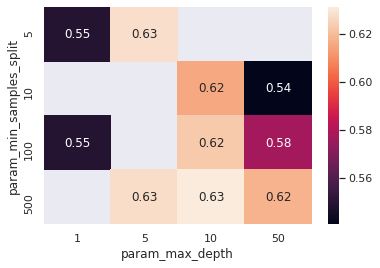

In [0]:
#reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html
import seaborn as sns
sns.set()
seaborn_data = results.pivot("param_min_samples_split","param_max_depth","mean_test_score")
ax = sns.heatmap(seaborn_data, annot=True)

In [97]:
best_paramsW =clf.best_params_
best_paramsW

{'max_depth': 10, 'min_samples_split': 500}

## Testing the performance of the model on test data, plotting ROC Curves

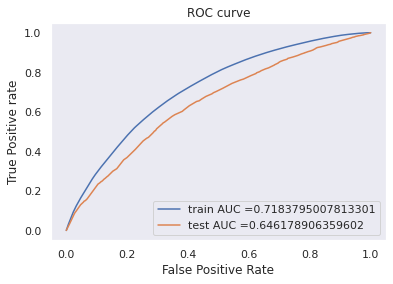

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


DTW_classifier = DecisionTreeClassifier(max_depth=best_paramsW['max_depth'],min_samples_split=best_paramsW['min_samples_split'])
DTW_classifier.fit(X_tr_w2vec,Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

#y_train_pred = batch_predict(multinb, X_tr_tfidf) 
y_train_pred=DTW_classifier.predict_proba(X_tr_w2vec)[:,1]   
y_test_pred = DTW_classifier.predict_proba(X_ts_w2vec)[:,1]


train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.title("ROC curve")
plt.grid()
plt.show()

In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


print("="*100)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
pred = predict_with_best_t(y_test_pred, best_t)
test_confusion_matrix =confusion_matrix(Y_test, predict_with_best_t(y_test_pred, best_t))
print(test_confusion_matrix)

the maximum value of tpr*(1-fpr) 0.4383280687403584 for threshold 0.853
Train confusion matrix
[[ 8088  4319]
 [22778 46751]]
Test confusion matrix
[[ 2330  1805]
 [ 7979 15198]]


## plotting wordcloud

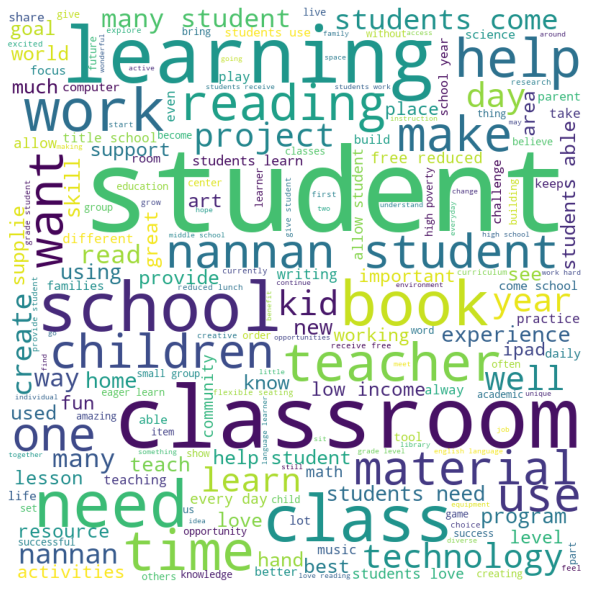

In [0]:
#reference: https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud
words = ''
#take out the index from Y_test
indexes = list(Y_test.index)
teacher_no_previously_posted = list()
price = list()
count = 0
for i in indexes:
  if Y_test[i]==0 and pred[count]==1:
    essay = X_test['essay'][i].split()
    price.append(X_test['price'][i])
    teacher_no_previously_posted.append(X_test['teacher_number_of_previously_posted_projects'][i])
    words += " ".join(essay)+" "
  count +=1  

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

## plotting price boxplot

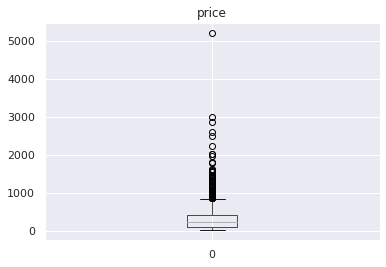

In [0]:
price_df = pd.DataFrame(price)
price_df.boxplot()
plt.title("price")
plt.show()

## plotting pdf

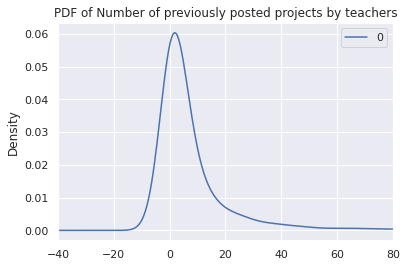

In [0]:
#https://scipy-lectures.org/intro/scipy/auto_examples/plot_normal_distribution.html#sphx-glr-download-intro-scipy-auto-examples-plot-normal-distribution-py
# from scipy import stats
# bins = np.linspace(-5, 5, 30)
# histogram, bins = np.histogram(teacher_no_previously_posted, bins=bins, density=True)
# bin_centers = 0.5*(bins[1:] + bins[:-1])

# pdf = stats.norm.pdf(bin_centers)
# plt.figure(figsize=(6, 4))
# plt.plot(bin_centers, pdf, label="PDF")
# plt.legend()
# plt.show()
new_df =pd.DataFrame(teacher_no_previously_posted)
new_df.plot.kde()
plt.title("PDF of Number of previously posted projects by teachers")
plt.xlim(-40,80)
plt.show()

# 1.6 Getting top features using `feature_importances_`

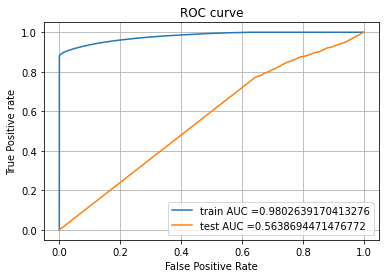

In [16]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


DT_classifier = DecisionTreeClassifier(min_samples_split=100)
DT_classifier.fit(X_tr_tfidf,Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

#y_train_pred = batch_predict(multinb, X_tr_tfidf) 
y_train_pred=DT_classifier.predict_proba(X_tr_tfidf)[:,1]   
y_test_pred = DT_classifier.predict_proba(X_ts_tfidf)[:,1]


train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.title("ROC curve")
plt.grid()
plt.show()

In [0]:
imp_features = list(DT_classifier.feature_importances_)
imp_feature = [i for i in imp_features if i !=0]
imp_feature.sort()

In [18]:
feature_names = essay + school_state +teacher_prefix+project_grade_category+clean_categories +clean_subcategories
feature_names.append('teacher_number_of_previously_posted_projects')
feature_names.append('price')
print(len(feature_names))

50319


## plotting top 20 features

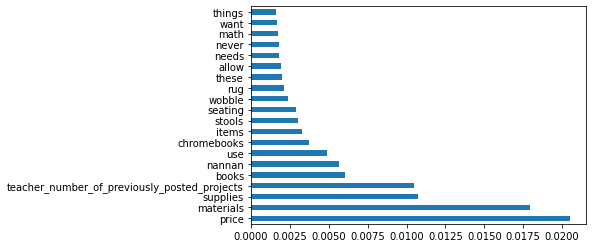

In [20]:
# feat_importances = pd.Series(DT_classifier.feature_importances_, index=feature_names)
# feat_importances.nlargest(20).plot(kind='barh')
# plt.show()

### Feature Selection

In [0]:
from sklearn.feature_selection import SelectFromModel

#reference: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel
#reference: https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

#selecting all the features which are greater than or equal to lowest feature_importance which are non zero
selection = SelectFromModel(DT_classifier, threshold=imp_feature[0], prefit=True)
select_X_train = selection.transform(X_tr_tfidf)



## training model based on important features

### finding best hyperparameter for DT model

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import plotly.graph_objects as go
import numpy as np
DT = DecisionTreeClassifier()
parameters = {"max_depth":[1, 5, 10, 50],"min_samples_split":[5, 10, 100, 500]}
clf = RandomizedSearchCV(DT,parameters,cv =3,scoring='roc_auc',return_train_score=True)
clf.fit(select_X_train,Y_train)


results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['rank_test_score'])
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,6.911979,0.171243,0.023504,0.000509,500,10,"{'min_samples_split': 500, 'max_depth': 10}",0.641001,0.651927,0.653566,0.648832,0.005577,1,0.691009,0.693698,0.687324,0.690677,0.002613
5,7.834094,0.366398,0.023444,0.000432,10,10,"{'min_samples_split': 10, 'max_depth': 10}",0.637040,0.646529,0.645704,0.643091,0.004292,2,0.697622,0.703598,0.696872,0.699364,0.003009
3,7.795937,0.278088,0.023256,0.000136,5,10,"{'min_samples_split': 5, 'max_depth': 10}",0.634956,0.645929,0.645688,0.642191,0.005117,3,0.698502,0.705372,0.695844,0.699906,0.004015
4,37.864075,1.422691,0.028133,0.000535,500,50,"{'min_samples_split': 500, 'max_depth': 50}",0.629474,0.619912,0.642158,0.630515,0.009112,4,0.843443,0.848632,0.829102,0.840392,0.008260
6,3.131347,0.029047,0.022359,0.000276,100,5,"{'min_samples_split': 100, 'max_depth': 5}",0.624013,0.628388,0.624749,0.625717,0.001913,5,0.638602,0.641957,0.638379,0.639646,0.001637


In [45]:
best_params =clf.best_params_
best_params

{'max_depth': 10, 'min_samples_split': 500}

### Training model on best hyperparameter

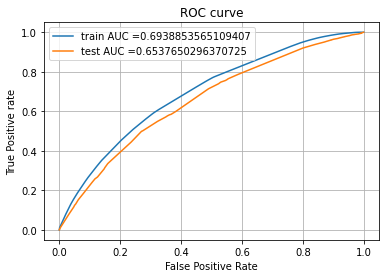

In [47]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


DT_classifier = DecisionTreeClassifier(max_depth=best_params['max_depth'],min_samples_split=best_params['min_samples_split'])
DT_classifier.fit(select_X_train,Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

#y_train_pred = batch_predict(multinb, X_tr_tfidf) 
y_train_pred=DT_classifier.predict_proba(select_X_train)[:,1] 
select_X_test = selection.transform(X_ts_tfidf)
y_test_pred = DT_classifier.predict_proba(select_X_test)[:,1]


train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.title("ROC curve")
plt.grid()
plt.show()

<h1>2. Summary</h1>

In [50]:
vectorizer =['TFIDF','TFIDF_W2VEC','TFIDF']
Model = ['Decision Tree','Decision Tree','DT With Feature Importance']
max_depth =[10,10,10]
min_max_split= [100,500,500]

Test_AUC = [0.6522250642615247,0.646178906359602,0.6537650296370725]
Train_AUC = [0.6930543026972202,0.7183795007813301,0.6938853565109407]

summary = pd.DataFrame({'vectorizer':vectorizer,'Model':Model,'max_depth':max_depth,'min_max_split':min_max_split,'Test_AUC':Test_AUC,
                       'Train_AUC':Train_AUC })
summary

,vectorizer,Model,max_depth,min_max_split,Test_AUC,Train_AUC
0,TFIDF,Decision Tree,10,100,0.652225,0.693054
1,TFIDF_W2VEC,Decision Tree,10,500,0.646179,0.718380
2,TFIDF,DT With Feature Importance,10,500,0.653765,0.693885
